In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

tokens = ['Token-1', 'Token-2', 'Token-3', 'Token-4']

# Sample token embeddings (2D vectors for simplicity)
token_embeddings = np.array([[0.9, 0.1], [0.2, 0.8],
                             [0.1, 0.9], [0.8, 0.2]])

# Simplified as identity matrices (Not training)
W_q = W_k = W_v = np.eye(2)

# Compute Query, Key, and Value matrices
Q = np.dot(token_embeddings, W_q)
K = np.dot(token_embeddings, W_k)
V = np.dot(token_embeddings, W_v)

attention_scores = np.dot(Q, K.T)
d_k = K.shape[1]
scaled_scores = attention_scores / np.sqrt(d_k)

attention_weights = (
    np.exp(scaled_scores) / 
    np.sum(np.exp(scaled_scores), 
    axis=1, keepdims=True)
)

contextualized_vectors = np.dot(attention_weights, V)

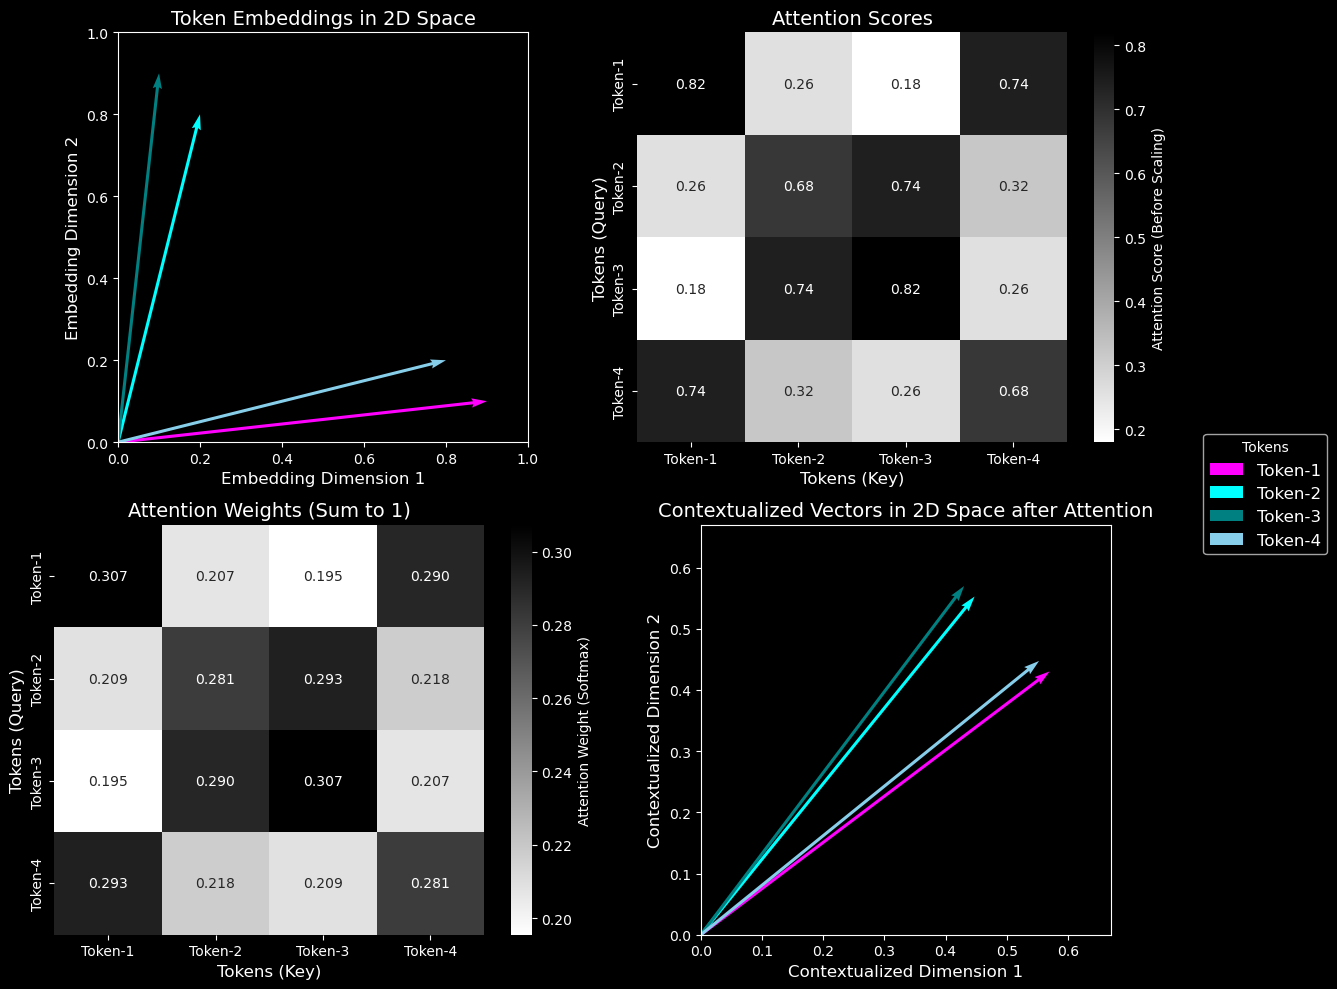

In [2]:
# Start visualization
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Distinct colors for tokens to aid visual clarity
colors = ['magenta', 'cyan', 'teal', 'skyblue']

# Plot 1: Token Embeddings in 2D
# Simplified to show raw token positions without applying transformations
ax = axs[0, 0]
for i, color in enumerate(colors):
    ax.quiver(0, 0, token_embeddings[i, 0], token_embeddings[i, 1], angles='xy', scale_units='xy', scale=1, color=color)
ax.set_xlim(0, np.max(token_embeddings[:, 0]) + 0.1)
ax.set_ylim(0, np.max(token_embeddings[:, 1]) + 0.1)
ax.set_xlabel('Embedding Dimension 1', fontsize=12)
ax.set_ylabel('Embedding Dimension 2', fontsize=12)
ax.set_title('Token Embeddings in 2D Space', fontsize=14)
ax.set_aspect('equal', 'box')

# Plot 2: Attention Scores Heatmap
# Shows raw similarity scores before scaling
ax = axs[0, 1]
sns.heatmap(
    attention_scores,
    annot=True,
    fmt=".2f",
    cmap="gray_r",
    cbar_kws={'label': 'Attention Score (Before Scaling)'},
    xticklabels=tokens,
    yticklabels=tokens,
    ax=ax
)
ax.set_xlabel('Tokens (Key)', fontsize=12)
ax.set_ylabel('Tokens (Query)', fontsize=12)
ax.set_title('Attention Scores', fontsize=14)

# Plot 3: Attention Weights Heatmap
# Highlights how softmax normalizes scores into interpretable weights
ax = axs[1, 0]
sns.heatmap(
    attention_weights,
    annot=True,
    fmt=".3f",
    cmap="gray_r",
    cbar_kws={'label': 'Attention Weight (Softmax)'},
    xticklabels=tokens,
    yticklabels=tokens,
    ax=ax
)
ax.set_xlabel('Tokens (Key)', fontsize=12)
ax.set_ylabel('Tokens (Query)', fontsize=12)
ax.set_title('Attention Weights (Sum to 1)', fontsize=14)

# Plot 4: Contextualized Vectors
# Depicts the final representation of tokens after applying attention
ax = axs[1, 1]
for i, color in enumerate(colors):
    ax.quiver(0, 0, contextualized_vectors[i, 0], contextualized_vectors[i, 1], angles='xy', scale_units='xy', scale=1, color=color)
ax.set_xlim(0, np.max(contextualized_vectors[:, 0]) + 0.1)
ax.set_ylim(0, np.max(contextualized_vectors[:, 1]) + 0.1)
ax.set_xlabel('Contextualized Dimension 1', fontsize=12)
ax.set_ylabel('Contextualized Dimension 2', fontsize=12)
ax.set_title('Contextualized Vectors in 2D Space after Attention', fontsize=14)
ax.set_aspect('equal', 'box')

# Add a common legend outside the plot
fig.legend(tokens, title="Tokens", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.tight_layout()
plt.show()

**Attention Mechanism**

**Formula:**  
$$
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
$$  

**Where:**  
- $Q, K, V$: Matrices representing query, key, and value vectors in (Query, Key, & Value space).  
- $d_k$: Dimension of the keys (used for scaling).  

**Why?**  
To focus on the most relevant parts of the input, enabling models to handle long dependencies effectively and improve performance in sequential tasks.

**Terms:**  
- **Query ($Q$):** What we are looking for.  
- **Key ($K$):** What we compare against.  
- **Value ($V$):** What we retrieve based on relevance.  


**Types:**  
1. **Self-Attention:** Focus on the same sequence.  
2. **Cross-Attention:** Focus between two sequences (e.g., encoder-decoder).  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')

# Sample token embeddings (2D) for 4 tokens
token_embeddings = np.array([[0.9, 0.1], 
                             [0.2, 0.8], 
                             [0.1, 0.9], # Closer to 2
                             [0.8, 0.2]]) # Closer to 1

tokens = ['Token-1', 'Token-2', 'Token-3', 'Token-4']

# Training these three matrices is one of the most
# important aspect of training LLMs
W_q = np.eye(2) # Query Weight Matrix
W_k = np.eye(2) # Key Weight Matrix
W_v = np.eye(2) # Value Weight Matrix

Q = np.dot(token_embeddings, W_q)
K = np.dot(token_embeddings, W_k)
V = np.dot(token_embeddings, W_v)

# Non-scaled
attention_scores = np.dot(Q, K.T)
d_k = Q.shape[1]
scaled_scores = attention_scores / np.sqrt(d_k)
attention_weights = (
    np.exp(scaled_scores) / np.sum(np.exp(scaled_scores), 
    axis=1, keepdims=True)
) # Based on Softmax (Scaled by output dimension=d_k)

contextualized_vectors = np.dot(attention_weights, V)
contextualized_vectors

# Create a 2x2 figure for the subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Define a color map for distinct token colors
colors = ['magenta', 'cyan', 'teal', 'skyblue']

# 1. Plot the Token Embeddings in 2D with arrows
ax = axs[0, 0]
for i, color in enumerate(colors):
    ax.quiver(0, 0, token_embeddings[i, 0], token_embeddings[i, 1], angles='xy', scale_units='xy', scale=1, color=color)

# Fixing limits to ensure the origin is at (0, 0)
ax.set_xlim(0, np.max(token_embeddings[:, 0]) + 0.1)  # Slightly extended on the positive side
ax.set_ylim(0, np.max(token_embeddings[:, 1]) + 0.1)  # Slightly extended on the positive side
ax.set_xlabel('Embedding Dimension 1', fontsize=12)
ax.set_ylabel('Embedding Dimension 2', fontsize=12)
ax.set_title('Token Embeddings in 2D Space', fontsize=14)
ax.set_aspect('equal', 'box')  # Ensuring equal scaling

# 2. Attention Scores Visualization (Grayscale Heatmap before scaling)
ax = axs[0, 1]
cax = ax.matshow(attention_scores, cmap='gray_r')  # Reversed grayscale (more black for higher attention)
cbar = fig.colorbar(cax, ax=ax)
cbar.set_label('Attention Score (Before Scaling)', fontsize=12)
ax.set_xticks(np.arange(len(tokens)))
ax.set_yticks(np.arange(len(tokens)))
ax.set_xticklabels(tokens)
ax.set_yticklabels(tokens)
ax.set_xlabel('Tokens (Key)', fontsize=12)
ax.set_ylabel('Tokens (Query)', fontsize=12)
ax.set_title('Attention Scores (Before Scaling)', fontsize=14)

# 3. Attention Weights Visualization (Grayscale Heatmap with higher attention as black)
ax = axs[1, 0]
cax = ax.matshow(attention_weights, cmap='gray_r')  # Reversed grayscale
cbar = fig.colorbar(cax, ax=ax)
cbar.set_label('Attention Weight (Softmax)', fontsize=12)
ax.set_xticks(np.arange(len(tokens)))
ax.set_yticks(np.arange(len(tokens)))
ax.set_xticklabels(tokens)
ax.set_yticklabels(tokens)
ax.set_xlabel('Tokens (Key)', fontsize=12)
ax.set_ylabel('Tokens (Query)', fontsize=12)
ax.set_title('Attention Weights (Softmax) - More Black = Higher Attention', fontsize=14)

# 4. Plot the Contextualized Vectors in 2D with arrows
ax = axs[1, 1]
for i, color in enumerate(colors):
    ax.quiver(0, 0, contextualized_vectors[i, 0], contextualized_vectors[i, 1], angles='xy', scale_units='xy', scale=1, color=color)

# Fixing limits to ensure the origin is at (0, 0)
ax.set_xlim(0, np.max(contextualized_vectors[:, 0]) + 0.1)  # Slightly extended on the positive side
ax.set_ylim(0, np.max(contextualized_vectors[:, 1]) + 0.1)  # Slightly extended on the positive side
ax.set_xlabel('Contextualized Dimension 1', fontsize=12)
ax.set_ylabel('Contextualized Dimension 2', fontsize=12)
ax.set_title('Contextualized Vectors in 2D Space after Attention', fontsize=14)
ax.set_aspect('equal', 'box')  # Ensuring equal scaling

# Adjusting the legend to be outside
fig.legend(tokens, title="Tokens", loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Sample token embeddings (2D) for 4 tokens
token_embeddings = np.array([[0.9, 0.1],  # Token 1
                             [0.2, 0.8],  # Token 2
                             [0.1, 0.9],  # Token 3 (same as Token 1)
                             [0.8, 0.2]]) # Token 4 (different)

# Tokens and their corresponding labels
tokens = ['Token-1', 'Token-2', 'Token-3', 'Token-4']

# Define random weight matrices for Q, K, and V transformations (2x2 for tokens)
np.random.seed(42)
W_q = np.eye(2)  # Token space to Query space
W_k = np.eye(2)  # Token space to Key space
W_v = np.eye(2, 2)  # Token space to Value space

# Compute Q, K, V matrices
Q = np.dot(token_embeddings, W_q)  # Queries
K = np.dot(token_embeddings, W_k)  # Keys
V = np.dot(token_embeddings, W_v)  # Values

# Step 1: Compute Attention Scores (Q @ K^T)
attention_scores = np.dot(Q, K.T)

# Step 2: Scale by sqrt(d_k) (for visualization only)
d_k = Q.shape[1]
scaled_scores = attention_scores / np.sqrt(d_k)

# Step 3: Apply Softmax to Get Attention Weights
attention_weights = np.exp(scaled_scores) / np.sum(np.exp(scaled_scores), axis=1, keepdims=True)

# Step 4: Compute Contextualized Vectors
contextualized_vectors = np.dot(attention_weights, V)

# Create a 2x2 figure for the subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Define a color map for distinct token colors
colors = ['magenta', 'cyan', 'teal', 'skyblue']

# 1. Plot the Token Embeddings in 2D with arrows
ax = axs[0, 0]
for i, color in enumerate(colors):
    ax.quiver(0, 0, token_embeddings[i, 0], token_embeddings[i, 1], angles='xy', scale_units='xy', scale=1, color=color)

# Fixing limits to ensure the origin is at (0, 0)
ax.set_xlim(0, np.max(token_embeddings[:, 0]) + 0.1)  # Slightly extended on the positive side
ax.set_ylim(0, np.max(token_embeddings[:, 1]) + 0.1)  # Slightly extended on the positive side
ax.set_xlabel('Embedding Dimension 1', fontsize=12)
ax.set_ylabel('Embedding Dimension 2', fontsize=12)
ax.set_title('Token Embeddings in 2D Space', fontsize=14)
ax.set_aspect('equal', 'box')  # Ensuring equal scaling

# 2. Attention Scores Visualization (Grayscale Heatmap before scaling)
ax = axs[0, 1]
cax = ax.matshow(attention_scores, cmap='gray_r')  # Reversed grayscale (more black for higher attention)
cbar = fig.colorbar(cax, ax=ax)
cbar.set_label('Attention Score (Before Scaling)', fontsize=12)
ax.set_xticks(np.arange(len(tokens)))
ax.set_yticks(np.arange(len(tokens)))
ax.set_xticklabels(tokens)
ax.set_yticklabels(tokens)
ax.set_xlabel('Tokens (Key)', fontsize=12)
ax.set_ylabel('Tokens (Query)', fontsize=12)
ax.set_title('Attention Scores (Before Scaling)', fontsize=14)

# 3. Attention Weights Visualization (Grayscale Heatmap with higher attention as black)
ax = axs[1, 0]
cax = ax.matshow(attention_weights, cmap='gray_r')  # Reversed grayscale
cbar = fig.colorbar(cax, ax=ax)
cbar.set_label('Attention Weight (Softmax)', fontsize=12)
ax.set_xticks(np.arange(len(tokens)))
ax.set_yticks(np.arange(len(tokens)))
ax.set_xticklabels(tokens)
ax.set_yticklabels(tokens)
ax.set_xlabel('Tokens (Key)', fontsize=12)
ax.set_ylabel('Tokens (Query)', fontsize=12)
ax.set_title('Attention Weights (Softmax) - More Black = Higher Attention', fontsize=14)

# 4. Plot the Contextualized Vectors in 2D with arrows
ax = axs[1, 1]
for i, color in enumerate(colors):
    ax.quiver(0, 0, contextualized_vectors[i, 0], contextualized_vectors[i, 1], angles='xy', scale_units='xy', scale=1, color=color)

# Fixing limits to ensure the origin is at (0, 0)
ax.set_xlim(0, np.max(contextualized_vectors[:, 0]) + 0.1)  # Slightly extended on the positive side
ax.set_ylim(0, np.max(contextualized_vectors[:, 1]) + 0.1)  # Slightly extended on the positive side
ax.set_xlabel('Contextualized Dimension 1', fontsize=12)
ax.set_ylabel('Contextualized Dimension 2', fontsize=12)
ax.set_title('Contextualized Vectors in 2D Space after Attention', fontsize=14)
ax.set_aspect('equal', 'box')  # Ensuring equal scaling

# Adjusting the legend to be outside
fig.legend(tokens, title="Tokens", loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample token embeddings (normalized) for 4 tokens
token_embeddings = np.array([[0.9, 0.1, 0.2, 0.3],  # Token 1
                             [0.4, 0.8, 0.2, 0.1],  # Token 2
                             [0.9, 0.1, 0.2, 0.3],  # Token 3 (same as Token 1)
                             [0.2, 0.6, 0.7, 0.1]]) # Token 4 (different)

# Tokens and their corresponding labels for the embedding components
tokens = [f'Token_{i + 1}' for i in range(4)]
embedding_representation = ['R', 'G', 'B', 'W']
color_map = ['red', 'green', 'blue', 'gray']  # Colors for R, G, B, W

# Normalize token embeddings to make sure they sum to 1 for each token
token_embeddings_normalized = token_embeddings / token_embeddings.sum(axis=1)[:, np.newaxis]

# Define random weight matrices for Q, K, and V transformations (size 4x4 for tokens)
np.random.seed(42)
W_q = np.eye(4)  # Token space to Query space
W_k = np.eye(4)  # Token space to Key space
W_v = np.eye(4, 4)  # Token space to Value space

# Compute Q, K, V matrices
Q = np.dot(token_embeddings_normalized, W_q)  # Queries
K = np.dot(token_embeddings_normalized, W_k)  # Keys
V = np.dot(token_embeddings_normalized, W_v)  # Values

# Step 1: Compute Attention Scores (Q @ K^T)
attention_scores = np.dot(Q, K.T)

# Step 2: Scale by sqrt(d_k)
d_k = Q.shape[1]
scaled_scores = attention_scores / np.sqrt(d_k)

# Step 3: Apply Softmax to Get Attention Weights
attention_weights = np.exp(scaled_scores) / np.sum(np.exp(scaled_scores), axis=1, keepdims=True)

# Step 4: Compute Contextualized Vectors
contextualized_colors = np.dot(attention_weights, V)

# Create a 2x2 figure for the subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 1. Stack bar graph as it is
ax = axs[0, 0]
bar_width = 0.2
x = np.arange(len(tokens))

for i in range(token_embeddings_normalized.shape[1]):
    ax.bar(x, token_embeddings_normalized[:, i], bottom=np.sum(token_embeddings_normalized[:, :i], axis=1),
           width=bar_width, label=embedding_representation[i], color=color_map[i])

ax.set_xticks(x)
ax.set_xticklabels(tokens)
ax.set_xlabel('Tokens', fontsize=12)
ax.set_ylabel('Normalized Color Intensity', fontsize=12)
ax.set_title('Normalized Color Intensities of Tokens', fontsize=14)
ax.legend(title='Color Components', fontsize=10)

# 2. Attention Scores Visualization (Grayscale Heatmap with higher attention as black)
ax = axs[0, 1]
cax = ax.matshow(scaled_scores, cmap='gray_r')  # Reversed grayscale (more black for higher attention)
cbar = fig.colorbar(cax, ax=ax)
cbar.set_label('Scaled Attention Score', fontsize=12)
ax.set_xticks(np.arange(len(tokens)))
ax.set_yticks(np.arange(len(tokens)))
ax.set_xticklabels(tokens)
ax.set_yticklabels(tokens)
ax.set_xlabel('Tokens (Key)', fontsize=12)
ax.set_ylabel('Tokens (Query)', fontsize=12)
ax.set_title('Scaled Attention Scores (More Black = Higher Attention)', fontsize=14)

# 3. Attention Weights Visualization (Grayscale Heatmap with higher attention as black)
ax = axs[1, 0]
cax = ax.matshow(attention_weights, cmap='gray_r')  # Reversed grayscale
cbar = fig.colorbar(cax, ax=ax)
cbar.set_label('Attention Weight (Softmax)', fontsize=12)
ax.set_xticks(np.arange(len(tokens)))
ax.set_yticks(np.arange(len(tokens)))
ax.set_xticklabels(tokens)
ax.set_yticklabels(tokens)
ax.set_xlabel('Tokens (Key)', fontsize=12)
ax.set_ylabel('Tokens (Query)', fontsize=12)
ax.set_title('Attention Weights (Softmax) - More Black = Higher Attention', fontsize=14)

# 4. Contextualized Colors (Final Output)
ax = axs[1, 1]
for i in range(contextualized_colors.shape[1]):
    ax.bar(x, contextualized_colors[:, i], bottom=np.sum(contextualized_colors[:, :i], axis=1),
           width=bar_width, label=embedding_representation[i], color=color_map[i])

ax.set_xticks(x)
ax.set_xticklabels(tokens)
ax.set_xlabel('Tokens', fontsize=12)
ax.set_ylabel('Contextualized Color Intensity', fontsize=12)
ax.set_title('Contextualized Colors after Attention', fontsize=14)
ax.legend(title='Color Components', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample token embeddings (normalized)
token_embeddings = np.array([[0.9, 0.1, 0.2, 0.3],  
                             [0.4, 0.8, 0.2, 0.1],  
                             [0.1, 0.2, 0.9, 0.5]])

# Tokens and their corresponding labels for the embedding components
tokens = [f'Token_{i + 1}' for i in range(3)]
embedding_representation = ['R', 'G', 'B', 'W']
color_map = ['red', 'green', 'blue', 'gray']  # Colors for R, G, B, W

# Normalize token embeddings to make sure they sum to 1 for each token
token_embeddings_normalized = token_embeddings / token_embeddings.sum(axis=1)[:, np.newaxis]

# Define random weight matrices for Q, K, and V transformations (size 4x4 for tokens)
np.random.seed(42)
W_q = np.eye(4)  # Token space to Query space
W_k = np.eye(4)  # Token space to Key space
W_v = np.eye(4, 4)  # Token space to Value space

# Compute Q, K, V matrices
Q = np.dot(token_embeddings_normalized, W_q)  # Queries
K = np.dot(token_embeddings_normalized, W_k)  # Keys
V = np.dot(token_embeddings_normalized, W_v)  # Values

# Step 1: Compute Attention Scores (Q @ K^T)
attention_scores = np.dot(Q, K.T)

# Step 2: Scale by sqrt(d_k)
d_k = Q.shape[1]
scaled_scores = attention_scores / np.sqrt(d_k)

# Step 3: Apply Softmax to Get Attention Weights
attention_weights = np.exp(scaled_scores) / np.sum(np.exp(scaled_scores), axis=1, keepdims=True)

# Step 4: Compute Contextualized Vectors
contextualized_colors = np.dot(attention_weights, V)

# Plotting the results

# 1. Original Token Colors (Normalized)
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.2
x = np.arange(len(tokens))

# Plot the original token colors as stacked bars
for i in range(token_embeddings_normalized.shape[1]):
    ax.bar(x, token_embeddings_normalized[:, i], bottom=np.sum(token_embeddings_normalized[:, :i], axis=1),
           width=bar_width, label=embedding_representation[i], color=color_map[i])

ax.set_xticks(x)
ax.set_xticklabels(tokens)
ax.set_xlabel('Tokens', fontsize=12)
ax.set_ylabel('Normalized Color Intensity', fontsize=12)
ax.set_title('Normalized Color Intensities of Tokens', fontsize=14)
ax.legend(title='Color Components', fontsize=10)
plt.tight_layout()
plt.show()

# 2. Attention Scores Visualization (Heatmap)
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(scaled_scores, cmap='viridis')
fig.colorbar(cax)
ax.set_xticks(np.arange(len(tokens)))
ax.set_yticks(np.arange(len(tokens)))
ax.set_xticklabels(tokens)
ax.set_yticklabels(tokens)
ax.set_xlabel('Tokens (Key)', fontsize=12)
ax.set_ylabel('Tokens (Query)', fontsize=12)
ax.set_title('Scaled Attention Scores', fontsize=14)
plt.tight_layout()
plt.show()

# 3. Attention Weights Visualization (Heatmap)
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(attention_weights, cmap='viridis')
fig.colorbar(cax)
ax.set_xticks(np.arange(len(tokens)))
ax.set_yticks(np.arange(len(tokens)))
ax.set_xticklabels(tokens)
ax.set_yticklabels(tokens)
ax.set_xlabel('Tokens (Key)', fontsize=12)
ax.set_ylabel('Tokens (Query)', fontsize=12)
ax.set_title('Attention Weights (Softmax)', fontsize=14)
plt.tight_layout()
plt.show()

# 4. Contextualized Colors (Final Output)
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(contextualized_colors.shape[1]):
    ax.bar(x, contextualized_colors[:, i], bottom=np.sum(contextualized_colors[:, :i], axis=1),
           width=bar_width, label=embedding_representation[i], color=color_map[i])

ax.set_xticks(x)
ax.set_xticklabels(tokens)
ax.set_xlabel('Tokens', fontsize=12)
ax.set_ylabel('Contextualized Color Intensity', fontsize=12)
ax.set_title('Contextualized Colors after Attention', fontsize=14)
ax.legend(title='Color Components', fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample token embeddings
token_embeddings = np.array([[0.9, 0.1, 0.2, 0.3],  
                             [0.4, 0.8, 0.2, 0.1],  
                             [0.1, 0.2, 0.9, 0.5]])

# Tokens and their corresponding labels for the embedding components
tokens = [f'Token_{i + 1}' for i in range(3)]
embedding_representation = ['R', 'G', 'B', 'W']
color_map = ['red', 'green', 'blue', 'gray']  # Changed 'white' to 'gray'

# Normalize token embeddings to make sure they sum to 1 for each token
token_embeddings_normalized = token_embeddings / token_embeddings.sum(axis=1)[:, np.newaxis]

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Plot stacked bars for each token with normalized intensities
x = np.arange(len(tokens))  # X-axis positions for the tokens
bar_width = 0.5

# Iterate over the token embeddings and create a stacked bar plot
for i in range(token_embeddings_normalized.shape[1]):
    ax.bar(x, token_embeddings_normalized[:, i], bottom=np.sum(token_embeddings_normalized[:, :i], axis=1),
           width=bar_width, label=embedding_representation[i], color=color_map[i])

# Configure plot
ax.set_xticks(x)
ax.set_xticklabels(tokens)
ax.set_xlabel('Tokens', fontsize=12)
ax.set_ylabel('Normalized Color Intensity', fontsize=12)
ax.set_title('Normalized Color Intensities of Tokens', fontsize=14)
ax.legend(title='Color Components', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Input embeddings: Tokens represent colors in YMCK (values in range 0-1 for simplicity)
token_colors = np.array([[0.9, 0.1, 0.2, 0.3],  # Token 1: Mostly Yellow
                          [0.4, 0.8, 0.2, 0.1],  # Token 2: Magenta dominant
                          [0.1, 0.2, 0.9, 0.5]]) # Token 3: Cyan dominant

# Define random weight matrices for Q, K, and V transformations (size 4x4 for YMCK)
np.random.seed(42)
W_q = np.random.rand(4, 4)  # YMCK to Query space
W_k = np.random.rand(4, 4)  # YMCK to Key space
W_v = np.random.rand(4, 4)  # YMCK to Value space

# Compute Q, K, V matrices
Q = np.dot(token_colors, W_q)  # Queries
K = np.dot(token_colors, W_k)  # Keys
V = np.dot(token_colors, W_v)  # Values

print("Q (Queries - Color Transformed):\n", Q)
print("\nK (Keys - Color Transformed):\n", K)
print("\nV (Values - Color Transformed):\n", V)

# Step 1: Compute Attention Scores (Q @ K^T)
attention_scores = np.dot(Q, K.T)

# Step 2: Scale by sqrt(d_k)
d_k = Q.shape[1]
scaled_scores = attention_scores / np.sqrt(d_k)

print("\nScaled Attention Scores (Q @ K.T / sqrt(d_k)):\n", scaled_scores)

# Step 3: Apply Softmax to Get Attention Weights
attention_weights = np.exp(scaled_scores) / np.sum(np.exp(scaled_scores), axis=1, keepdims=True)
print("\nAttention Weights (Softmax):\n", attention_weights)

# Step 4: Compute Contextualized Vectors
contextualized_colors = np.dot(attention_weights, V)
print("\nContextualized Colors (Attention Weights @ V):\n", contextualized_colors)